In [34]:
path_head = r"G:\target_strength\2020_06_17_TS_submarine_13m_head\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [35]:
filelist_head = glob(path_head)

In [3]:
filelist_head

['G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1710_AI0_3k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1714_AI0_4k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1717_AI0_5k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1722_AI0_6k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1727_AI0_7k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1732_AI0_8k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1736_AI0_9k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1741_AI0_10k.wav']

In [4]:
path_tank = r"G:\target_strength\2020_06_17_TS_submarine_13m_tank\*.wav"

In [5]:
filelist_tank = glob(path_tank)

In [6]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [17]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.values = self.values - np.mean(self.values)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=1
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [14]:
# SL_raw = {}
# SL_report = {}
# for index, file in enumerate(filelist):
#     if index%2==0:
#         threshold = 0.12
#     else:
#         threshold = 0.06
#     a = SL(file)
#     a.readWavFileToArray()
#     a.findPeakIndex(threshold)
#     a.calculateSL()
#     data = a.getSL()
#     SL_raw[a.plot_title]=data
    
#     sl = np.array(data)
#     SL_report[a.plot_title]=(np.mean(sl))

In [8]:
filelist_head

['G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1710_AI0_3k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1714_AI0_4k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1717_AI0_5k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1722_AI0_6k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1727_AI0_7k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1732_AI0_8k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1736_AI0_9k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1741_AI0_10k.wav']

title: AI0_5k
total lenght: 27025000, time duration: 263


<IPython.core.display.Javascript object>


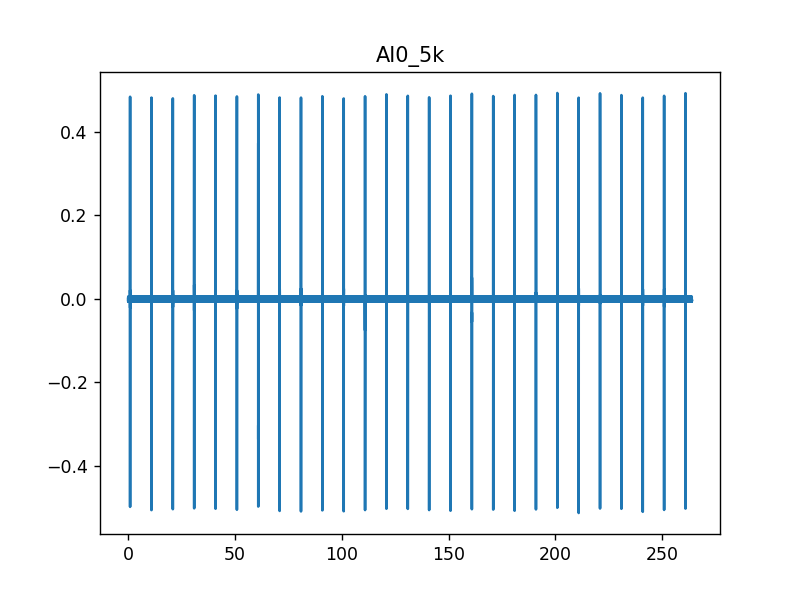

In [18]:
b = SL(filelist_head[2])
b.readWavFileToArray()
b.plot()

<IPython.core.display.Javascript object>


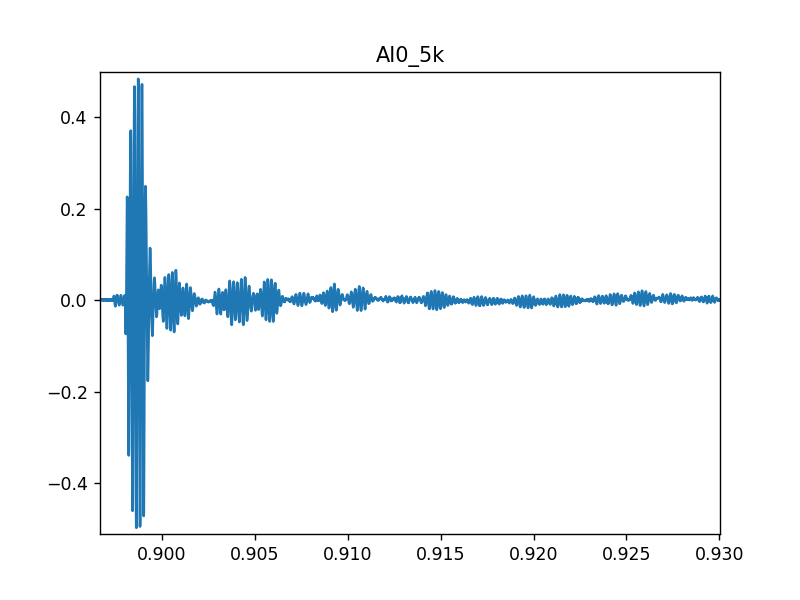

In [30]:
b.plot()

title: AI0_5k
total lenght: 25500000, time duration: 249


<IPython.core.display.Javascript object>


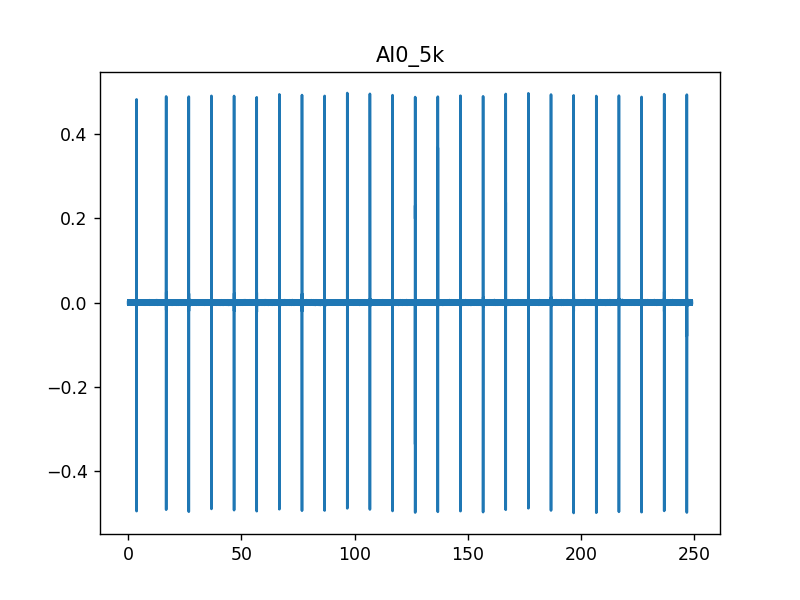

In [19]:
a = SL(filelist_tank[2])
a.readWavFileToArray()
a.plot()

In [20]:
b.findPeakIndex(0.2)
# b.plotWithFilterPeak()
# b.calculateSL()

total sound generated: 27


In [21]:
a.findPeakIndex(0.2)
# a.plotWithFilterPeak()
# a.calculateSL()

total sound generated: 25


In [22]:
index_head = b.getIndex()
index_tank = a.getIndex()

In [23]:
print("index_head number: {}".format(len(index_head)))
print("index_tank number: {}".format(len(index_tank)))

index_head number: 162
index_tank number: 150


In [22]:
print(index_tank[6*5])
print(index_head[6*5])

5815031
5212942


In [15]:
diff = index_tank[5*5:5*15]-index_head[5*5:5*15]
diff

array([602089, 602089, 602088, 602089, 602088, 602089, 602088, 602089,
       602089, 602088, 602088, 602088, 602087, 602088, 602088, 602087,
       602088, 602087, 602088, 602087, 602088, 602087, 602088, 602087,
       602087, 602086, 602087, 602086, 602087, 602086, 602086, 602086,
       602086, 602087, 602086, 602085, 602086, 602085, 602085, 602086,
       602085, 602085, 602085, 602085, 602085, 602085, 602085, 602084,
       602085, 602085])

In [23]:
len(index_head)

162

In [24]:
data_head = b.getData()
data_tank = a.getData()

In [25]:
time_head = b.getTime()
time_tank = a.getTime()

In [19]:
shift = int(np.mean(diff))
shift

602086

<IPython.core.display.Javascript object>


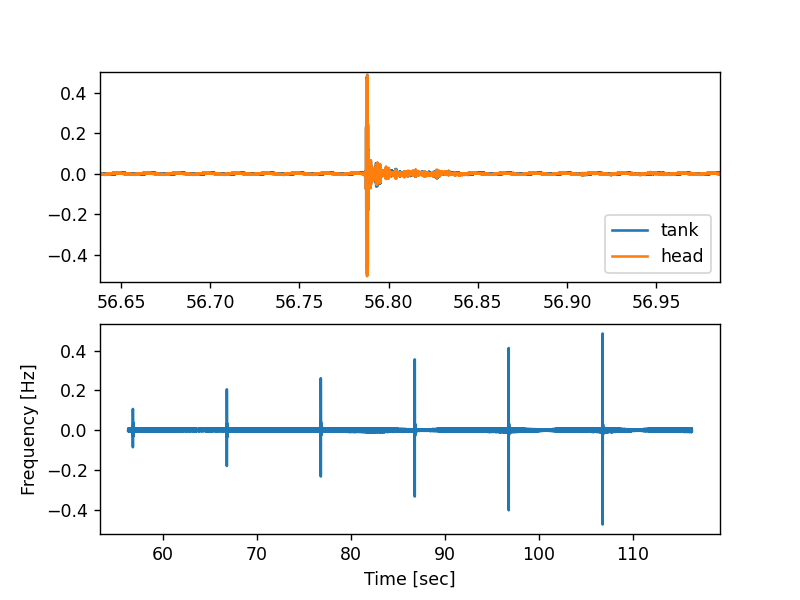

In [50]:
fig, ax = plt.subplots(2,1)
fs = 102400
time_tank_start = int(index_tank[6*5]-fs*0.5)
time_head_start = int(index_head[6*5]-fs*0.5)
end_tank = time_tank_start+fs*60
end_head = time_head_start+fs*60
shift=-1
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_tank[time_tank_start+shift:end_tank], label="tank")
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_head[time_head_start:end_head-shift], label="head")
ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax[0].legend(loc=4)
# fig.tight_layout()

<IPython.core.display.Javascript object>


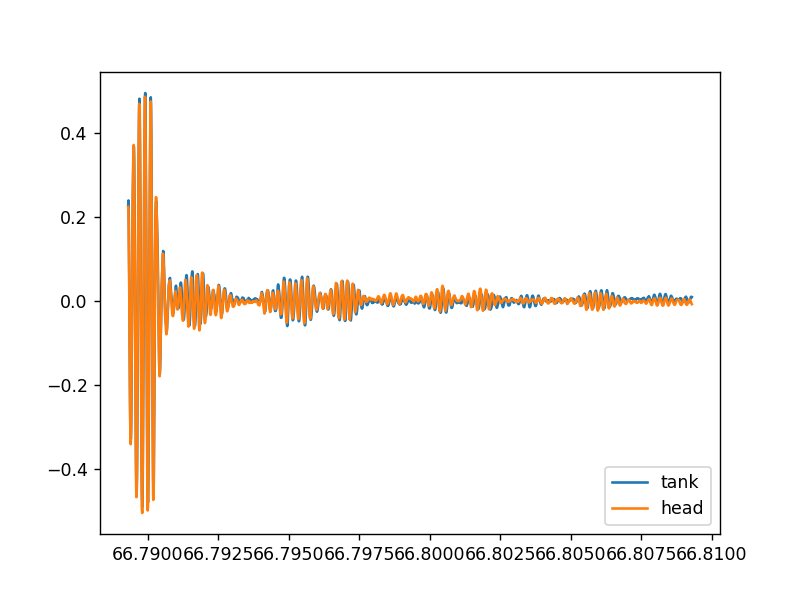

In [102]:
fig, ax = plt.subplots()
fs = 102400
time_tank_start = int(index_tank[6*5])
time_head_start = int(index_head[6*5])
end_tank = int(time_tank_start+fs*0.02)
end_head = int(time_head_start+fs*0.02)
shift=-1
ax.plot(time_tank[time_tank_start+shift:end_tank], data_tank[time_tank_start+shift:end_tank], label="tank")
ax.plot(time_tank[time_tank_start+shift:end_tank], data_head[time_head_start:end_head-shift], label="head")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=4)
# fig.tight_layout()

In [89]:
index_tank = index_tank[6:]
len(index_tank)

144

In [26]:
fs = 102400
start_head = int(index_head[0]-0.01*fs)
end_head = int(start_head + fs*0.11)
start_tank = int(index_tank[0]-0.01*fs)
end_tank = int(start_tank + fs*0.11)

add_head = data_head[start_head:end_head]
add_tank = data_tank[start_tank:end_tank]
for i in range(1, 24):
    start_head = int(index_head[6*i]-0.01*fs)
    end_head = int(start_head + fs*0.11)
    start_tank = int(index_tank[6*i]-0.01*fs)
    end_tank = int(start_tank + fs*0.11)
    
    head = data_head[start_head:end_head]
    tank = data_tank[start_tank:end_tank]
    
    add_head = add_head + head
    add_tank = add_tank + tank

In [31]:
start_tank = int(index_tank[0]-0.01*fs)
end_tank = int(start_tank + fs*0.11)
sigle_tank = data_tank[start_tank:end_tank]

<IPython.core.display.Javascript object>


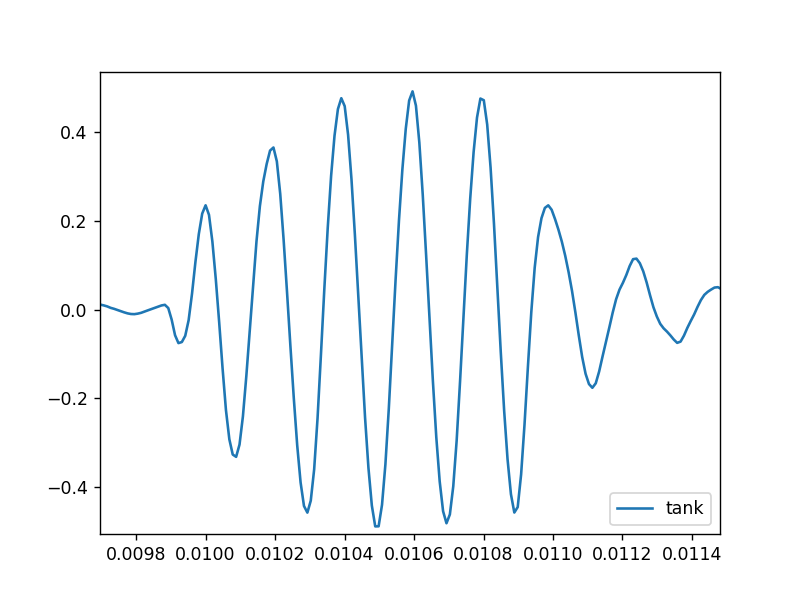

In [36]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_head))/fs

ax.plot(time, add_tank/24, label="tank")
# ax.plot(time, sigle_tank, label="sigle strike")
# ax.plot(time, add_head, label="head")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=4)
# fig.tight_layout()

In [40]:
fs = 102400
start_template = int(fs*0.00987)
end_template = int(fs*0.01117)
template = add_tank[start_template:end_template]/24
fir = template[::-1]

<IPython.core.display.Javascript object>


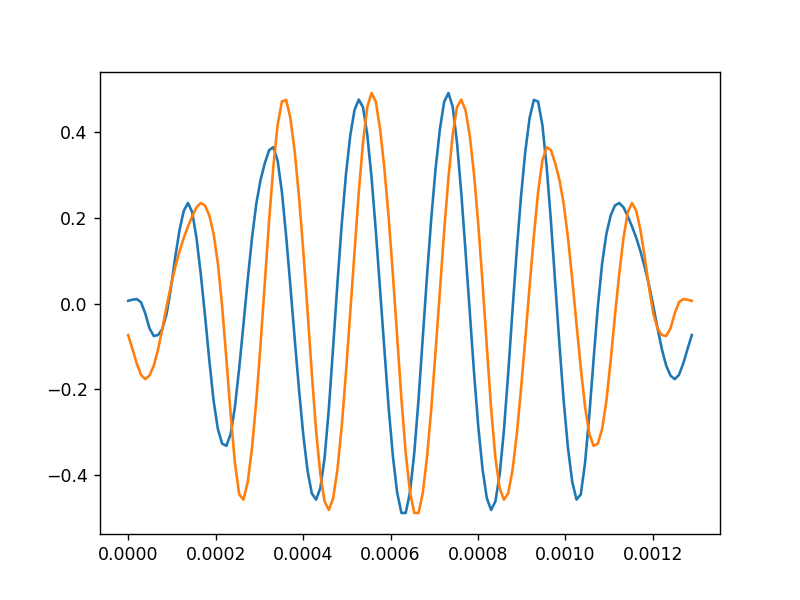

In [41]:
fs = 102400
time = np.arange(len(template))/fs
fig, ax = plt.subplots()
ax.plot(time, template)
ax.plot(time, fir)

In [44]:
from scipy import signal 
det = signal.lfilter(fir, 1, add_tank/24)

In [45]:
print("length of the tank: {}".format(len(add_tank)))
print("length of the fir: {}".format(len(fir)))
print("length of the det: {}".format(len(det)))

length of the tank: 11264
length of the fir: 133
length of the det: 11264


In [52]:
shift = np.argmax(det)-np.argmax(add_tank)

In [53]:
shift_det = det[shift:]
shift_add = add_tank[:-shift]

<IPython.core.display.Javascript object>


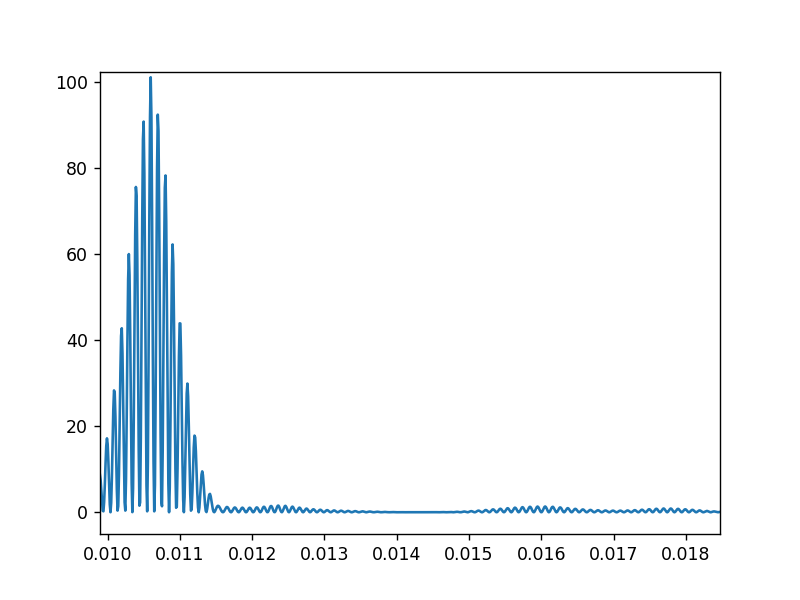

In [58]:
fs = 102400
time = np.arange(len(shift_det))/fs
fig, ax = plt.subplots()
ax.plot(time, shift_det*shift_det, label="det")
# ax.plot(time, shift_add, label="tank")


In [51]:
np.argmax(det)-np.argmax(add_tank)

57

In [59]:
def findPeakIndex(x):
    fs = 102400
    mask = ((x[1:-1]-x[2:])>0)*((x[1:-1]-x[:-2])>0)
    indexs = []
    for index, i in enumerate(mask):
        if(i):
            indexs.append(index+1)
    indexs = np.array(indexs)
    return indexs
def findPeakIndexIndex(x, i_x):
    fs = 102400
    mask = ((x[1:-1]-x[2:])>0)*((x[1:-1]-x[:-2])>0)
    indexs = []
    for index, i in enumerate(mask):
        if(i):
            indexs.append(index+1)
    indexs = np.array(indexs)
    return i_x[indexs]

In [75]:
index_det = findPeakIndex(shift_det*shift_det)
i_i_det = findPeakIndexIndex(shift_det[index_det], index_det)
i_i_i_det = findPeakIndexIndex(shift_det[i_i_det], i_i_det)

<IPython.core.display.Javascript object>


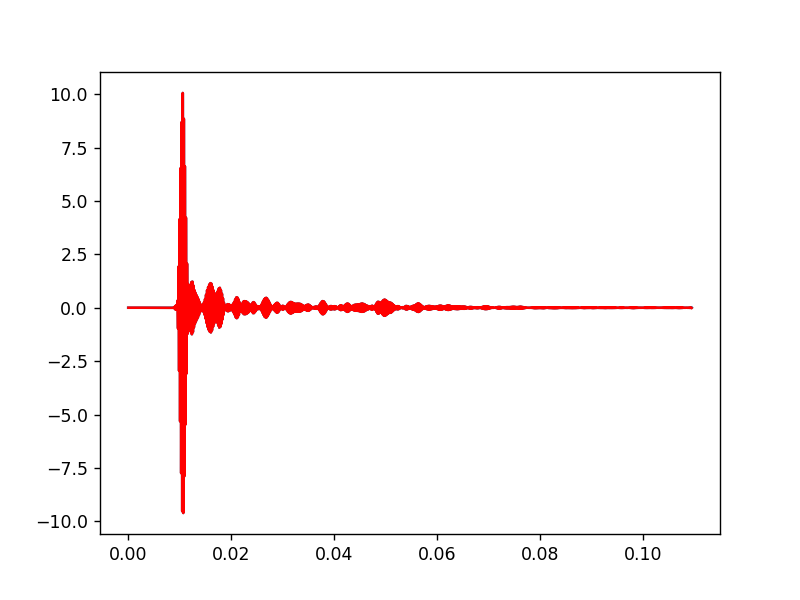

In [72]:
fs = 102400
time = np.arange(len(shift_det))/fs
fig, ax = plt.subplots()
# ax.plot(time, shift_det*shift_det, label="det")
ax.plot(time, shift_det, label="det")
ax.set_label("peak of shift_det")
# log_det = np.log10(shift_det[i_i_det])
ax.plot(time[index_det], shift_det[index_det], 'r-')

In [74]:
len(shift_det)

11207

<IPython.core.display.Javascript object>


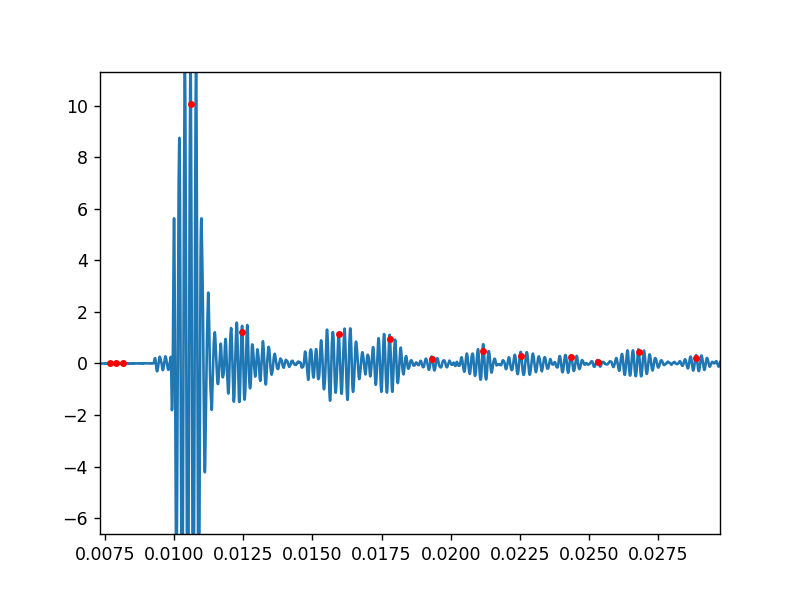

In [78]:
fs = 102400
time = np.arange(len(shift_add))/fs
fig, ax = plt.subplots()
# ax.plot(time, shift_det*shift_det, label="det")
ax.plot(time, shift_add, label="tank")
ax.set_label("tank signal with matched filter mark")
# log_det = np.log10(shift_det[i_i_i_det])
ax.plot(time[i_i_i_det], shift_det[i_i_i_det], 'r.')


In [70]:
np.log10(10)

1.0

In [50]:
np.argmax(add_tank)

1085

<IPython.core.display.Javascript object>


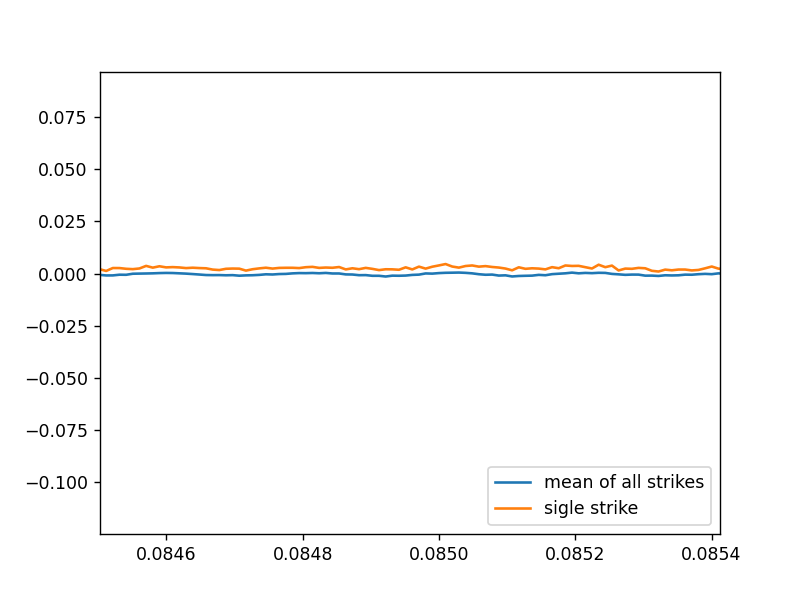

In [33]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_head))/fs

ax.plot(time, add_tank/24, label="mean of all strikes")
ax.plot(time, sigle_tank, label="sigle strike")
# ax.plot(time, add_head, label="head")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=4)
# fig.tight_layout()

<IPython.core.display.Javascript object>


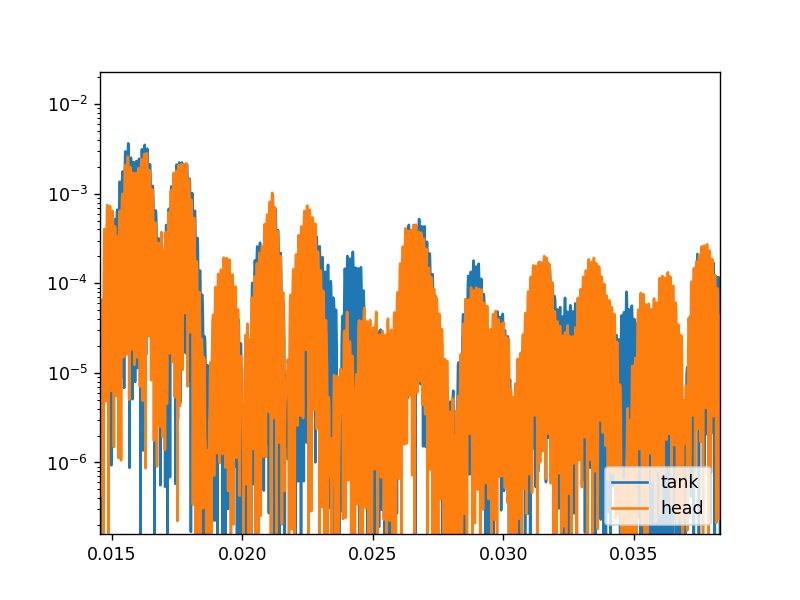

In [100]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_head))/fs

ax.plot(time, add_tank/24*add_tank/24, label="tank")
ax.plot(time, add_head/24*add_head/24, label="head")
ax.set_yscale("log")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=4)
# fig.tight_layout()

<IPython.core.display.Javascript object>


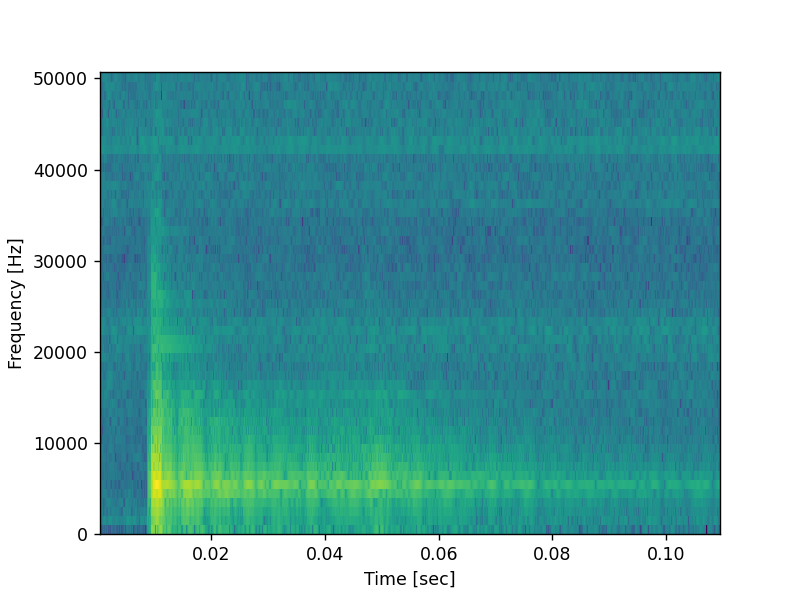

In [99]:
f, t, Sxx = signal.spectrogram(add_tank, fs, noverlap=92, nperseg=103)
Sxx = np.log10(Sxx) 
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()